## **Problem Statement**
# Predicting Turbine Energy Yield (TEY) using ambient variables as features.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DATA

/content/drive/MyDrive/DATA


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Import Dataset
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## 3. Data Exploration <a class="anchor" id="3"></a>

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [ ]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

- We have no missing data so all the entries are valid for use.

- Now we can check the column names to get a better understanding of what features we will be basing our regression on.

### 3.1 Descriptive Analysis<a class="anchor" id="3.1"></a>

In [ ]:
df.shape

(15039, 11)

In [ ]:
#Checking the data types
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
#Unique values for every feature
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df[df.duplicated()].shape

(0, 11)

In [ ]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


The features are not on the same scale. For example `AP` has a mean of `1013.19` and `CO` has a mean value of `1.97`. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [ ]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [ ]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## 4. Data Visualization<a class="anchor" id="4"></a>

[Table of Contents](#0.1)

+ ###  Univariate plots<a class="anchor" id="4.1"></a>

Next let's get the distribution of animal data across the types of classes.

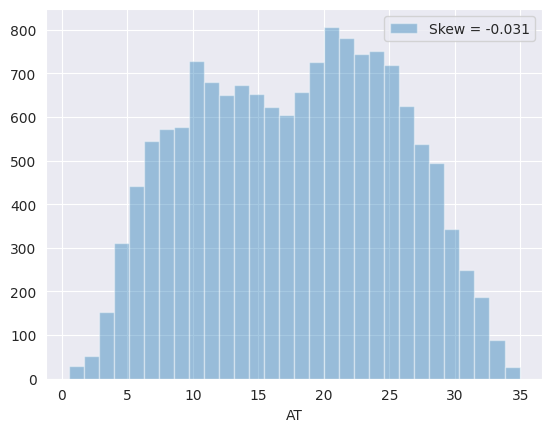

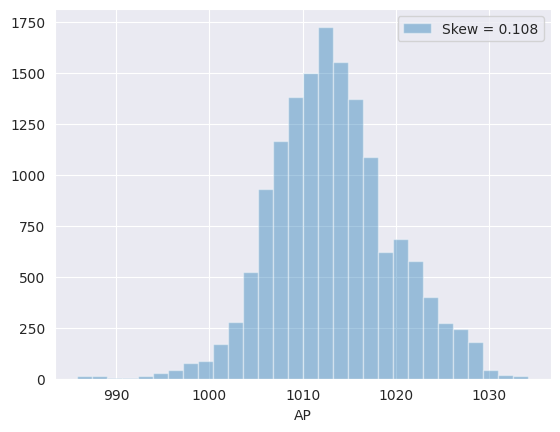

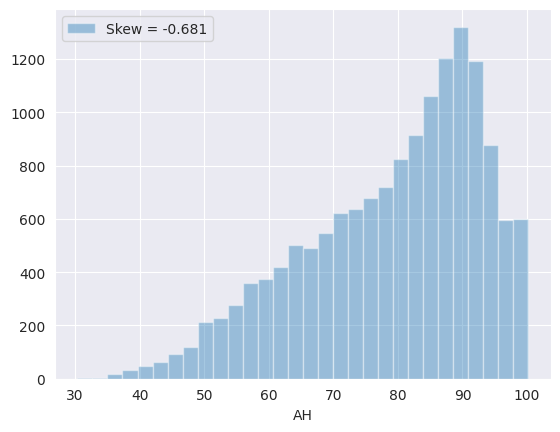

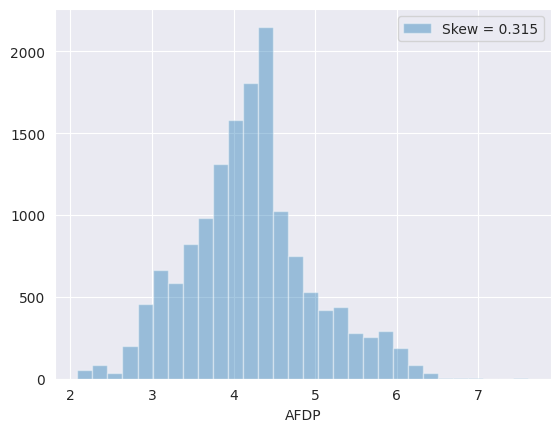

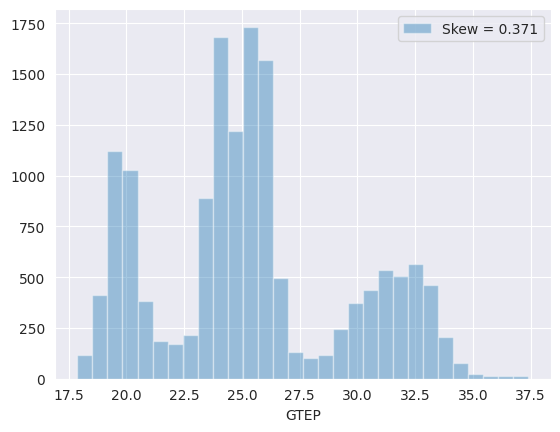

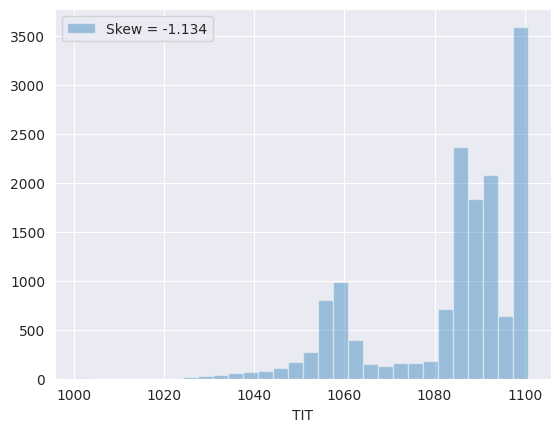

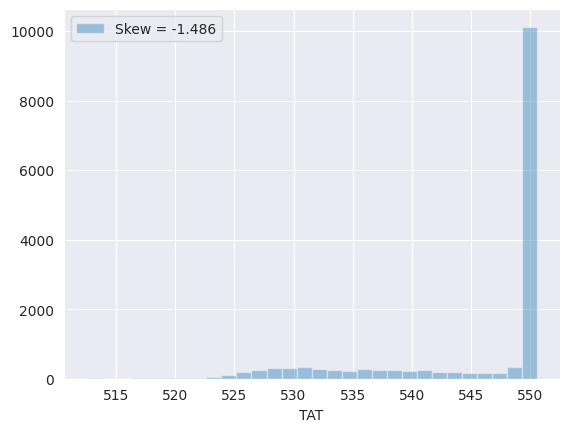

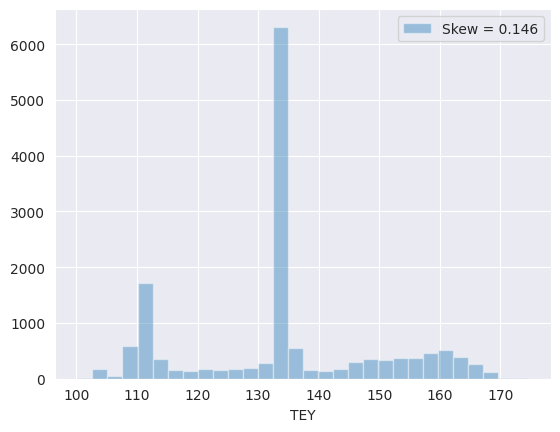

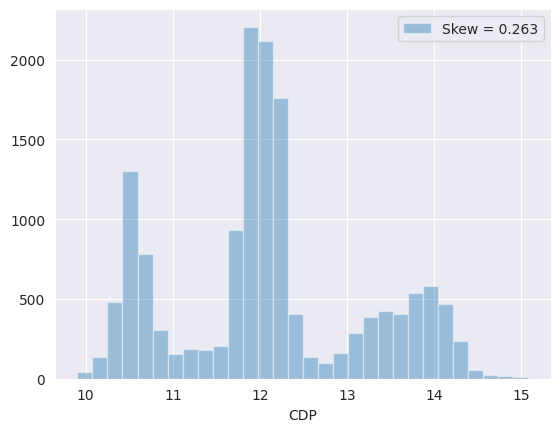

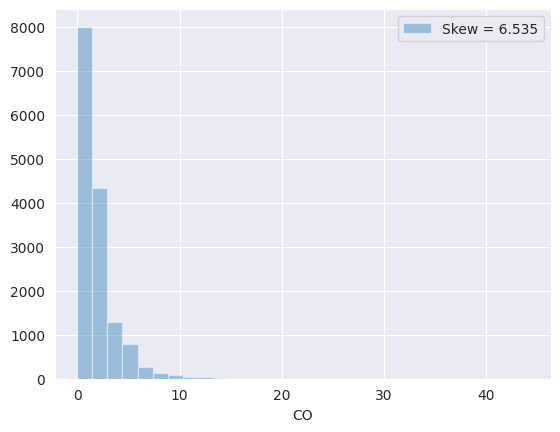

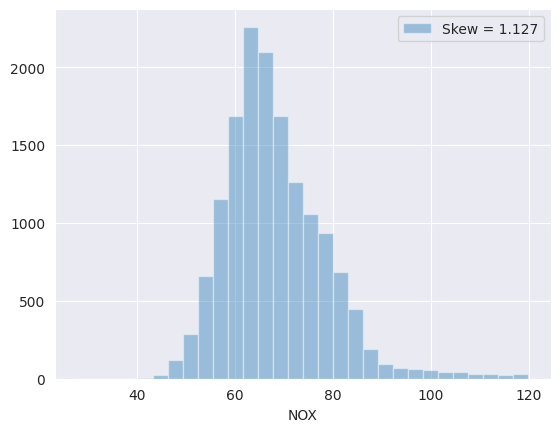

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature	(TIT) and Turbine after temperature	(TAT) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


##### Mmm hmm! there exists observations with multiple outliers.

Let's examine the boxplots for the several distributions

In [ ]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

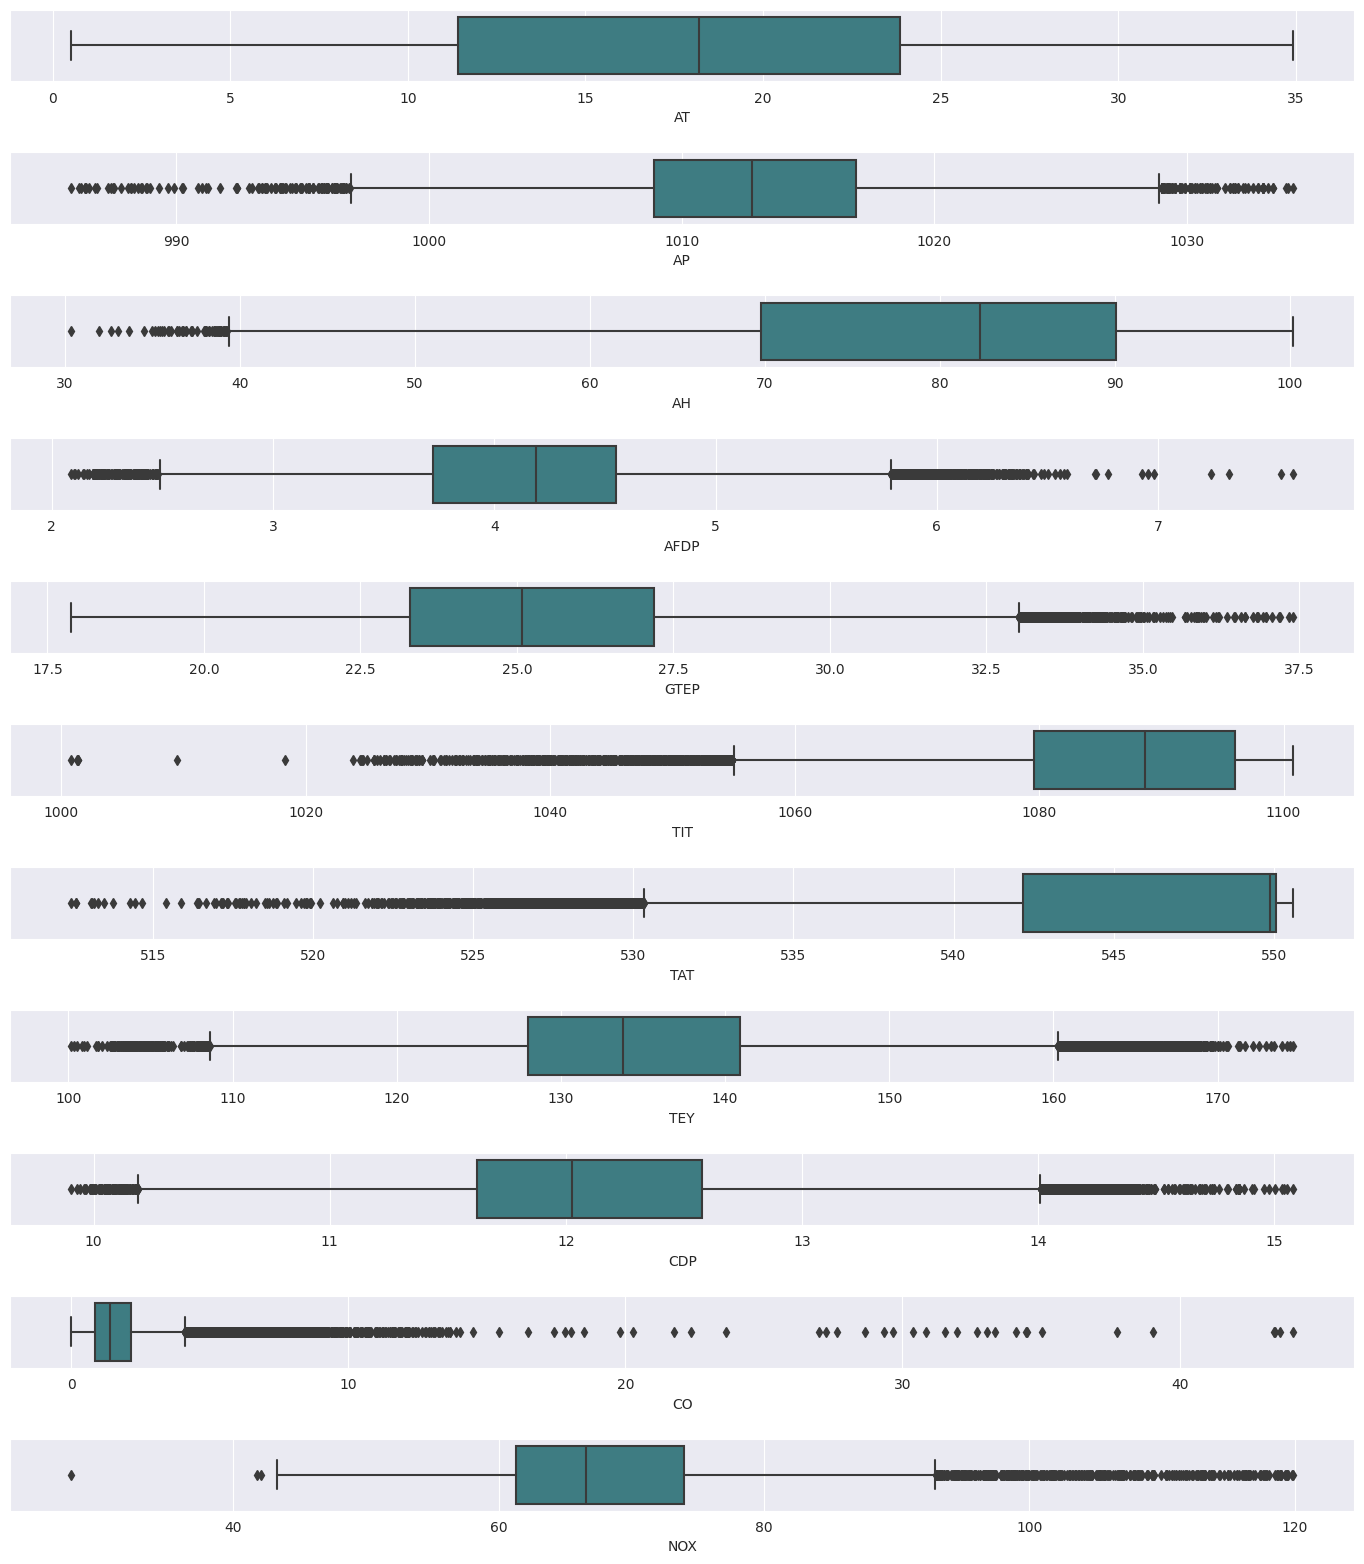

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

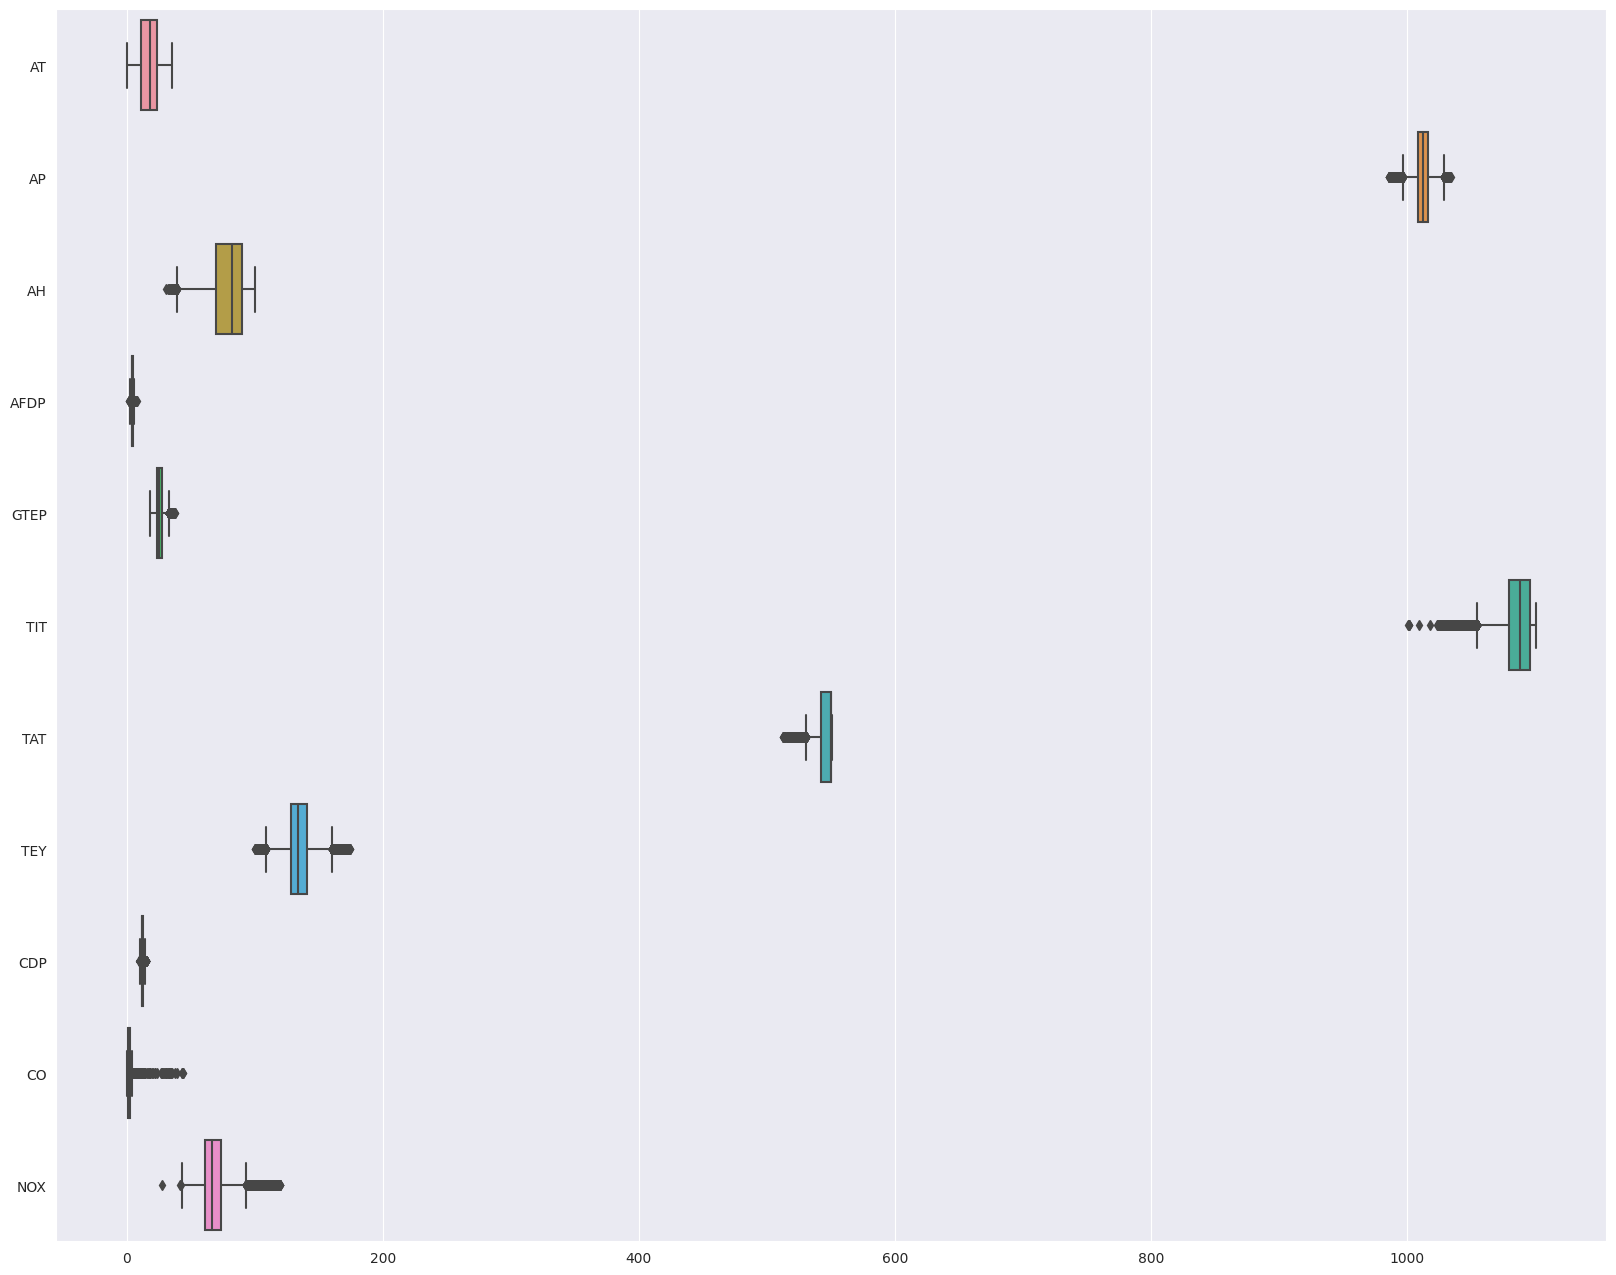

In [ ]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

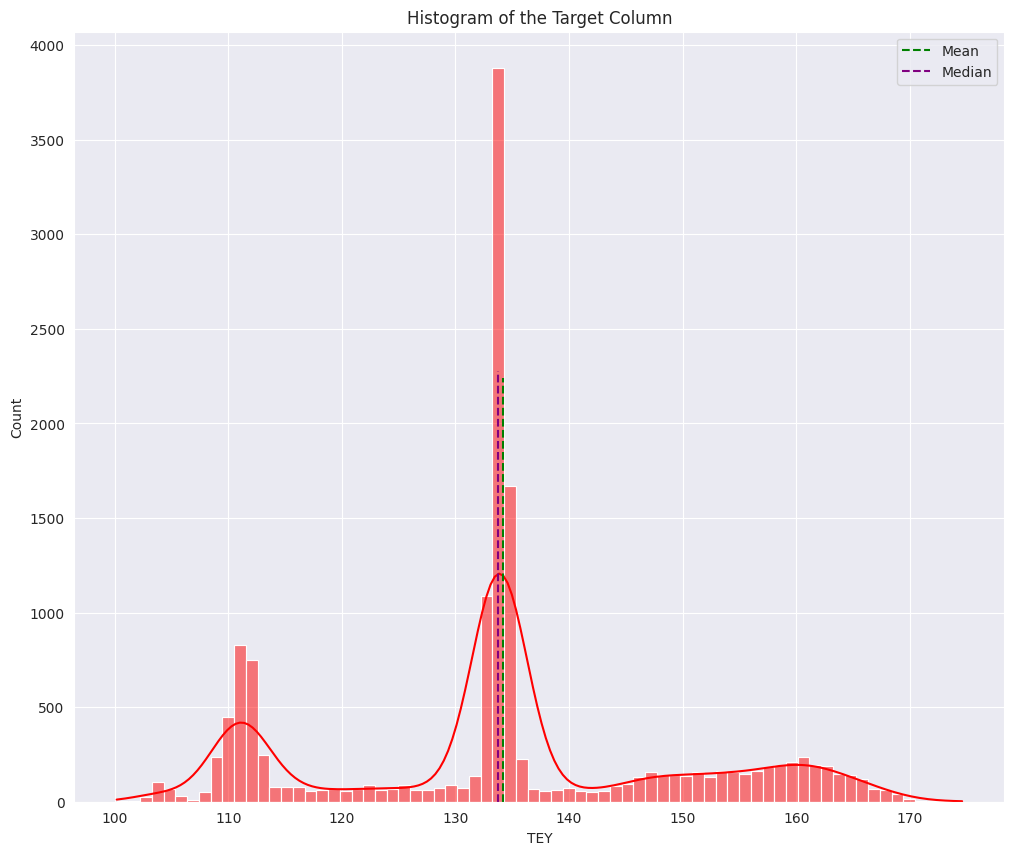

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

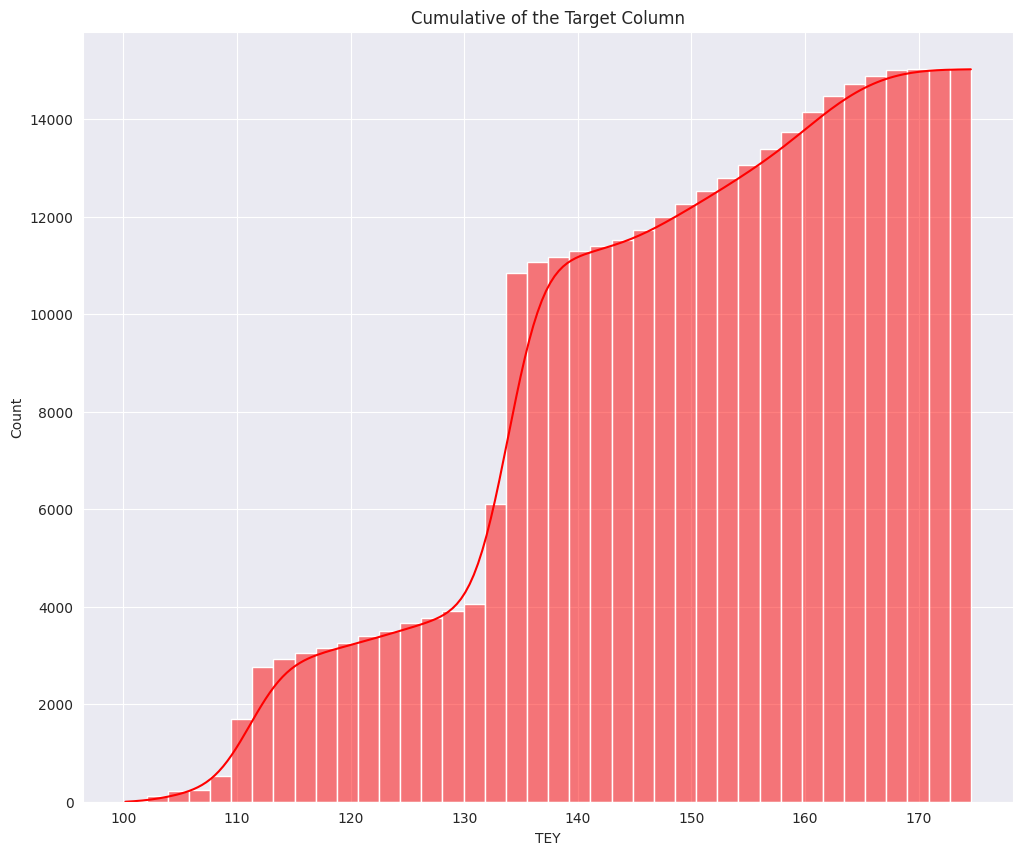

In [ ]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

#### Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.

[Table of Contents](#0.1)

+ ### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

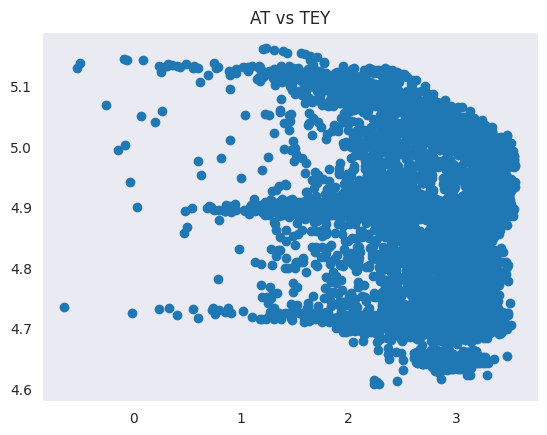

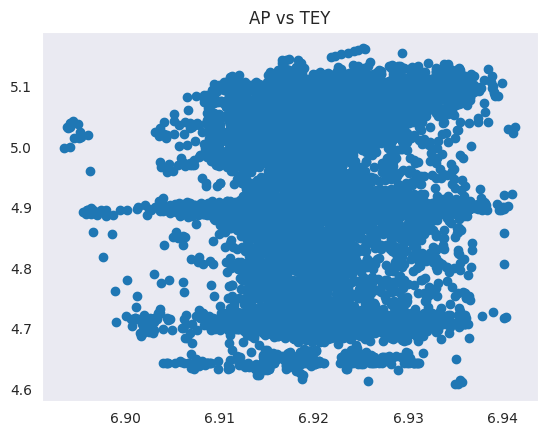

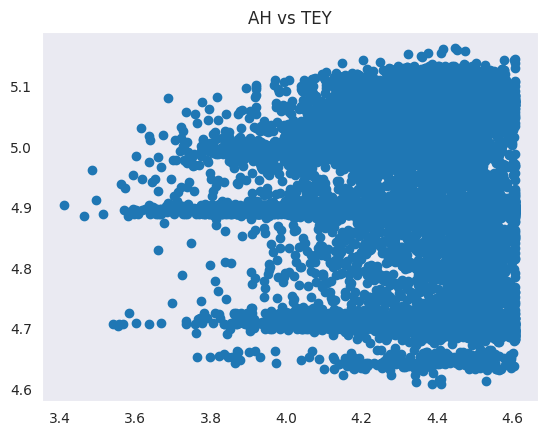

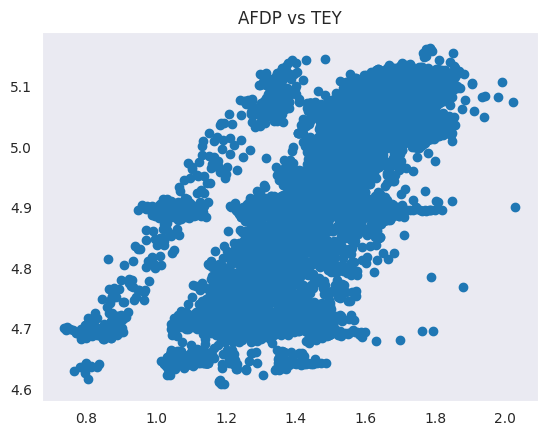

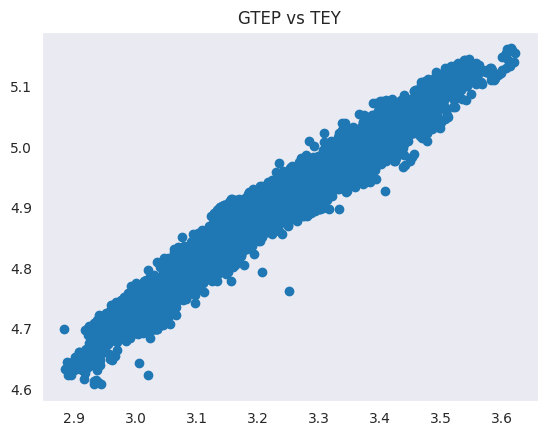

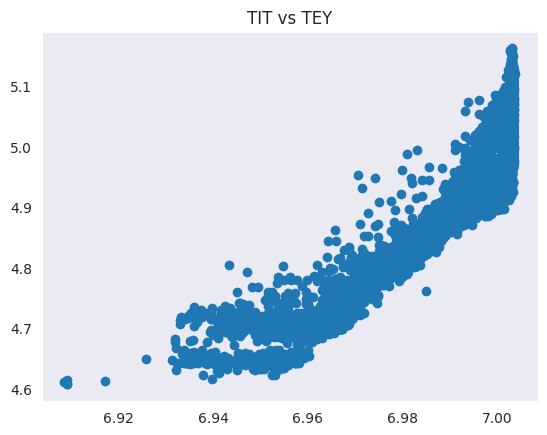

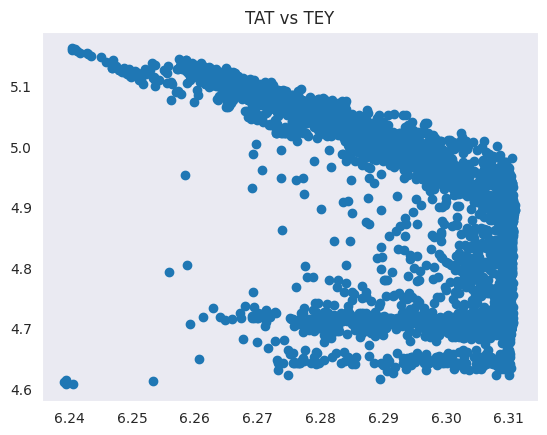

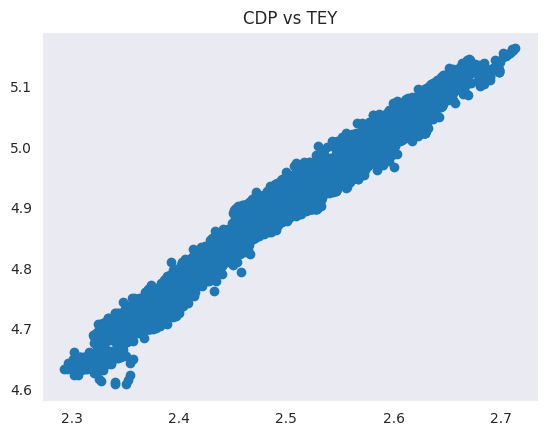

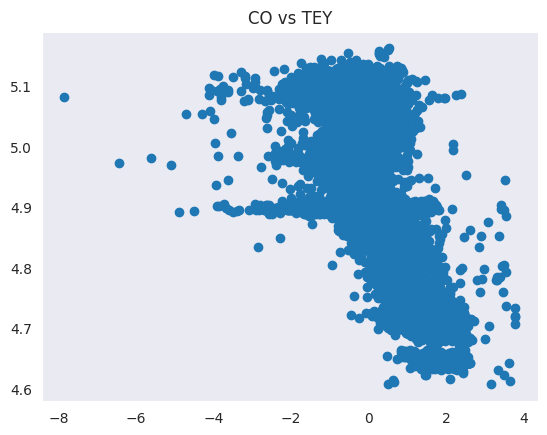

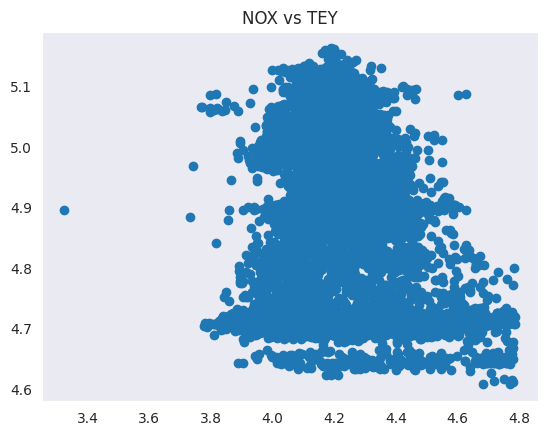

In [ ]:
for i in df.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [ ]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},

                 diag_kws= {'color': '#82ad32'})

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

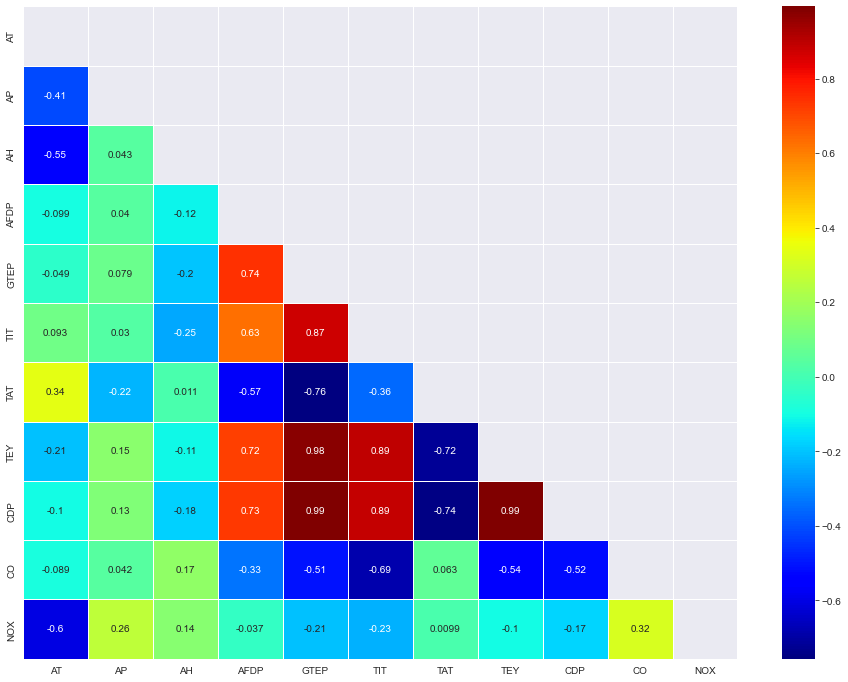

In [ ]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [ ]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

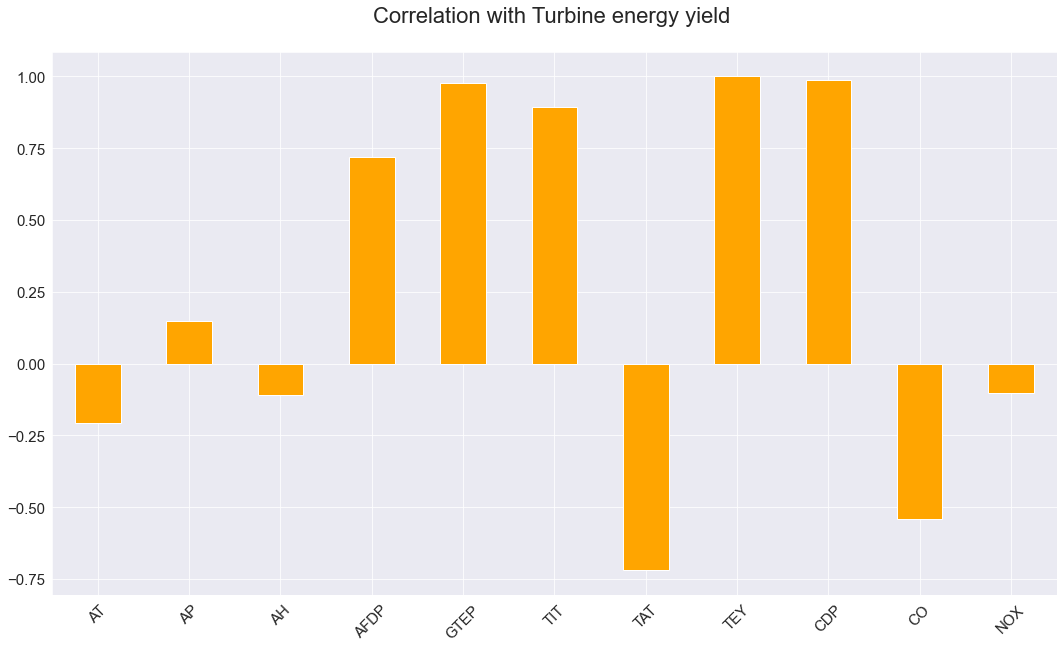

In [ ]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

[Table of Contents](#0.1)

## 5. Feature Selection Technique<a class="anchor" id="5"></a>

In [ ]:
#Feature importance
from numpy import set_printoptions

In [ ]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [ ]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712704,CDP
4,1.599840,GTEP
5,1.325077,TIT
6,0.891890,TAT
3,0.660760,AFDP
8,0.512258,CO
0,0.412339,AT
9,0.301021,NOX
1,0.140308,AP
2,0.097477,AH


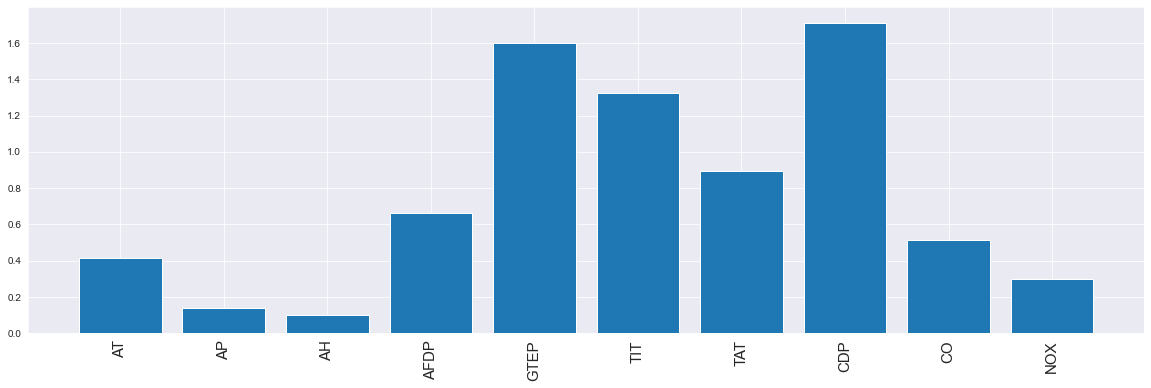

In [ ]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

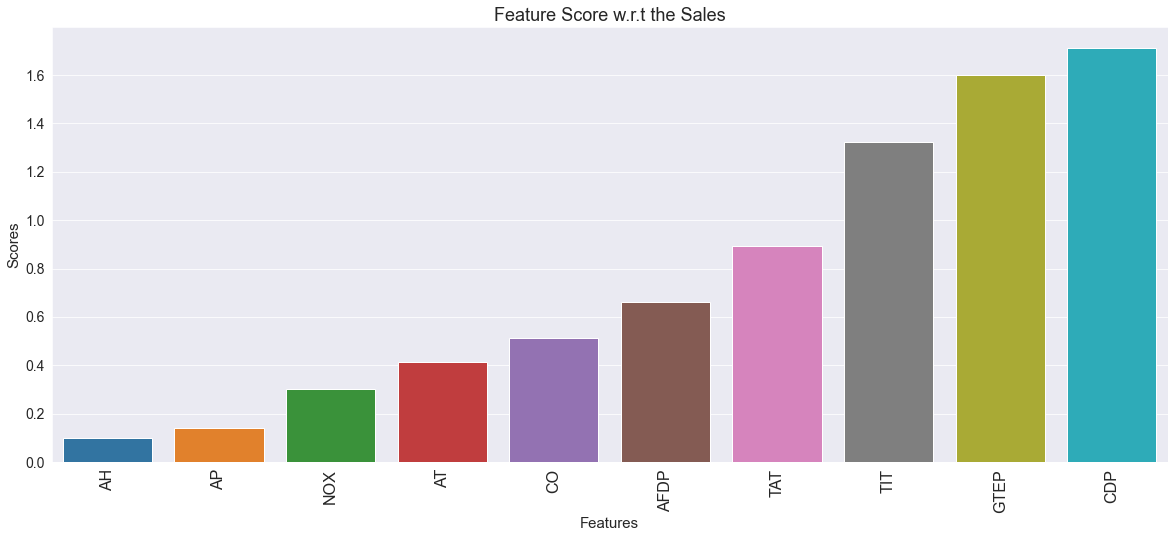

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.712704,CDP
4,1.599840,GTEP
5,1.325077,TIT
6,0.891890,TAT
3,0.660760,AFDP
8,0.512258,CO
0,0.412339,AT
9,0.301021,NOX
1,0.140308,AP
2,0.097477,AH


In [ ]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


[Table of Contents](#0.1)

### 5.1. Data Pre-Processing<a class="anchor" id="5.1"></a>
#### Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

![FilterMethods](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

#### Feature Engineering

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [ ]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [ ]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


#### Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [ ]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP       0.0
GTEP      0.0
TIT      -0.0
TAT       0.0
AFDP      0.0
CO        0.0
AT       -0.0
TEY     134.2
dtype: float64 
Standard Devaition 
 CDP      1.0
GTEP     1.0
TIT      1.0
TAT      1.0
AFDP     1.0
CO       1.0
AT       1.0
TEY     16.0
dtype: float64 1


[Table of Contents](#0.1)

### 5.2 Test Train Split With Imbalanced Dataset<a class="anchor" id="5.2"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)


In [ ]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [ ]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

[Table of Contents](#0.1)

## 6. Hyperparameter Tuning<a class="anchor" id="6"></a>

### 6.1 **`Hyperparameter Tuning`**: Optimal Learning rate ,Number of Layers and Neurons<a class="anchor" id="6.1"></a>

In [ ]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Oracle triggered exit


Trial 5 Complete [00h 05m 01s]
val_mean_absolute_error: 0.4440057973066966

Best val_mean_absolute_error So Far: 0.4288428723812103
Total elapsed time: 00h 29m 24s


In [ ]:
tuner.results_summary()

### 6.2 **`Hyperparameter Tuning`**: Optimal Batch_size, Number of Epochs<a class="anchor" id="6.2"></a>

In [ ]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [ ]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result = grid.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.5385425746440887, using {'batch_size': 40, 'epochs': 200}
-1.3277084469795226,0.4157314466582501 with {'batch_size': 10, 'epochs': 10}
-1.2819799065589905,0.6388210326784041 with {'batch_size': 10, 'epochs': 50}
-0.6195487558841706,0.22372498685599693 with {'batch_size': 10, 'epochs': 100}
-0.6067143261432648,0.14244373523566725 with {'batch_size': 10, 'epochs': 200}
-1.6372950077056885,0.312710777433406 with {'batch_size': 20, 'epochs': 10}
-0.797945237159729,0.24094883948455134 with {'batch_size': 20, 'epochs': 50}
-0.9796943306922913,0.3860892553758134 with {'batch_size': 20, 'epochs': 100}
-0.5884879648685455,0.13458080593764546 with {'batch_size': 20, 'epochs': 200}
-2.6895342111587524,1.1914054795904954 with {'batch_size': 40, 'epochs': 10}
-1.5166579246520997,0.5587834119397824 with {'batch_size': 40, 'epochs': 50}
-0.9263822197914123,0.28557928597207294 with {'batch_size': 40, 'epochs': 100}
-0.5385425746440887,0.09872459202891593 with {'batch_size': 40, 'epochs': 200}


[Table of Contents](#0.1)

### 6.3 **`Hyperparameter Tuning`**: Optimal Droupout rate<a class="anchor" id="6.3"></a>

In [ ]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [ ]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.6679447650909424, using {'dropout_rate': 0.3}
-0.8323201537132263,0.26923293832543493 with {'dropout_rate': 0.0}
-1.1670883774757386,0.5794670480557291 with {'dropout_rate': 0.1}
-1.182572340965271,0.5096832458496641 with {'dropout_rate': 0.2}
-0.6679447650909424,0.27758018642107785 with {'dropout_rate': 0.3}
-1.0636109471321107,0.20700826606234907 with {'dropout_rate': 0.4}
-0.9452173233032226,0.20756484640550968 with {'dropout_rate': 0.5}


### 6.4 **`Hyperparameter Tuning`**: Optimal Activation Function and Kernel Initializer<a class="anchor" id="6.4"></a>

In [ ]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [ ]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -3.122679662704468, using {'activation_function': 'softmax', 'init': 'uniform'}
-3.5212940216064452,0.8786527863154662 with {'activation_function': 'softmax', 'init': 'normal'}
-3.122679662704468,0.6747694999995387 with {'activation_function': 'softmax', 'init': 'uniform'}
-3.262042427062988,1.3589116630891251 with {'activation_function': 'softmax', 'init': 'zero'}
-3.5312024116516114,0.7796613422378148 with {'activation_function': 'tanh', 'init': 'normal'}
-4.61785249710083,1.342868088610206 with {'activation_function': 'tanh', 'init': 'uniform'}
-3.2921382427215575,0.5384224892388144 with {'activation_function': 'tanh', 'init': 'zero'}
-4.91969141960144,1.3631206250623549 with {'activation_function': 'relu', 'init': 'normal'}
-3.7872642040252686,1.9546784298801612 with {'activation_function': 'relu', 'init': 'uniform'}
-3.934886360168457,1.6337526760723777 with {'activation_function': 'relu', 'init': 'zero'}


[Table of Contents](#0.1)

### 7. Model Building Neural Networks<a class="anchor" id="7"></a>

#### Standardizing only predictor variable - after train test split

In [ ]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [ ]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [ ]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

In [ ]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: 97.73075369067175
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: 99.5585905304457
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: 99.65107608927266
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: 99.64736833004822
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: 80.90613588380201
94/94 [==============================] - 0s 3ms/step
batch_size: 10 - epochs: 10 Accuracy: 98.2573511745601
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: 99.65084677862158
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: 99.58161139512534
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 5 Accuracy: 58.854512990805404
94/94 [==================

,batchsize,epochs,Accuracy
0,5,5,97.730754
0,5,10,99.558591
0,5,50,99.651076
0,5,100,99.647368
0,10,5,80.906136
0,10,10,98.257351
0,10,50,99.650847
0,10,100,99.581611
0,15,5,58.854513
0,15,10,89.824179


In [ ]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index          0.000000
batchsize     20.000000
epochs       100.000000
Accuracy      99.684789
Name: 15, dtype: float64

#### Training Model - using best params

In [ ]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

[Table of Contents](#0.1)

### 7.1 Model Evaluation Train and Test Error<a class="anchor" id="7.1"></a>

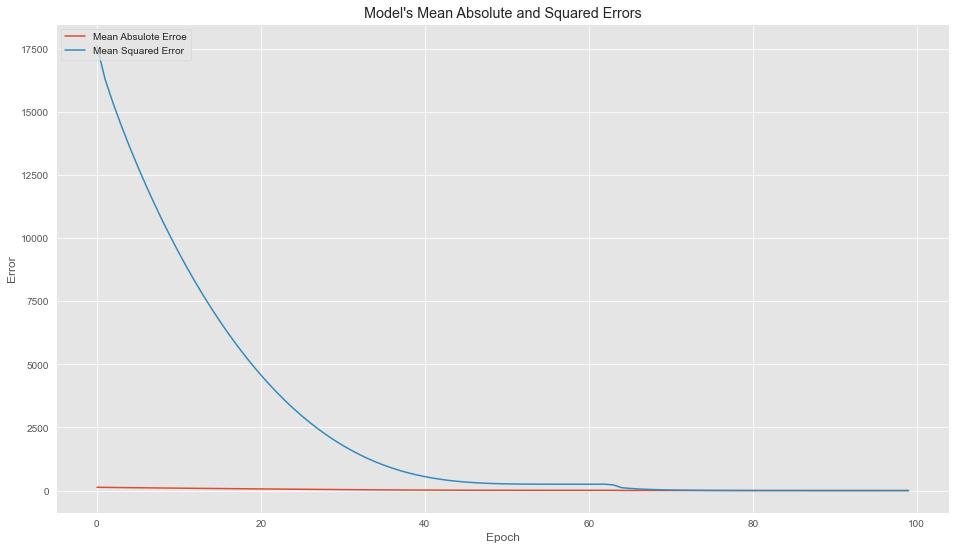

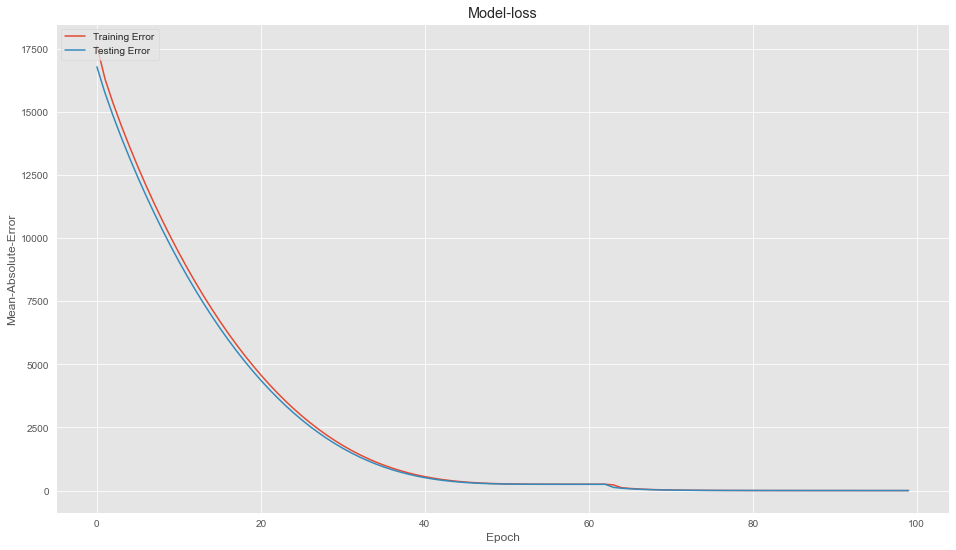

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

[Table of Contents](#0.1)

### 7.2 Predicting values from Model using same dataset<a class="anchor" id="7.2"></a>

In [ ]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.671204
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.273460
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.256805
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.045410
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.272774
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.671730
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.790131
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.272095
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.486389
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.446960


In [ ]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

[Table of Contents](#0.1)

### 7.3 Calculating Absolute Percent Error and Error<a class="anchor" id="7.3"></a>

In [ ]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.64609758691824


,Actual,Predicted,Error,APE %
13312,134.46,134.671204,-0.001571,0.157075
12627,111.88,112.273460,-0.003517,0.351681
6393,133.72,134.256805,-0.004014,0.401440
4990,133.79,134.045410,-0.001909,0.190904
12462,110.77,111.272774,-0.004539,0.453890


In [ ]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,Error,APE %
0,134.46,134.671204,-0.001571,0.157075
1,111.88,112.273460,-0.003517,0.351681
2,133.72,134.256805,-0.004014,0.401440
3,133.79,134.045410,-0.001909,0.190904
4,110.77,111.272774,-0.004539,0.453890
...,...,...,...,...
3003,119.25,119.828529,-0.004851,0.485140
3004,133.74,134.065872,-0.002437,0.243661
3005,146.31,147.964294,-0.011307,1.130678
3006,150.07,150.383911,-0.002092,0.209176


[Table of Contents](#0.1)

### 7.4 Visualizing the Relationship between the Actual and Predicted ValuesModel Validation<a class="anchor" id="7.4"></a>

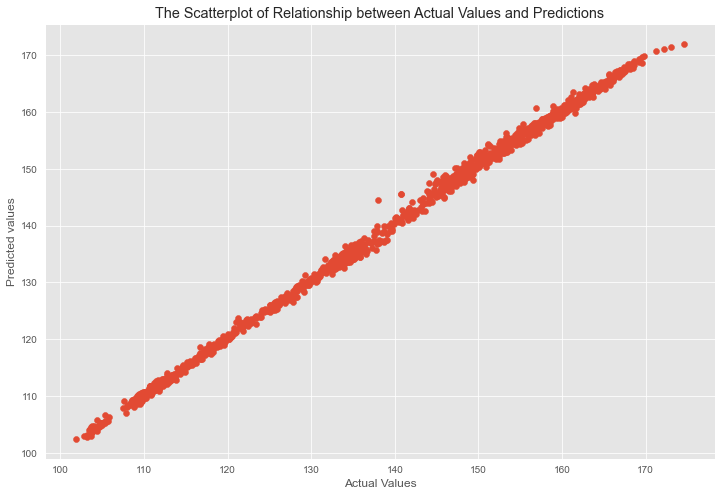

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [ ]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.4806557943465863
MSE: 0.46965791965828263
RMSE: 0.6853159268966997


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9973425736949953
R2_score (test):  0.9970628081081423


In [ ]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.74 of the target correctly


[Table of Contents](#0.1)

### 7.5 Residual Analysis<a class="anchor" id="7.5"></a>
+ Test for Normality of Residuals (Q-Q Plot)

<AxesSubplot:ylabel='Density'>

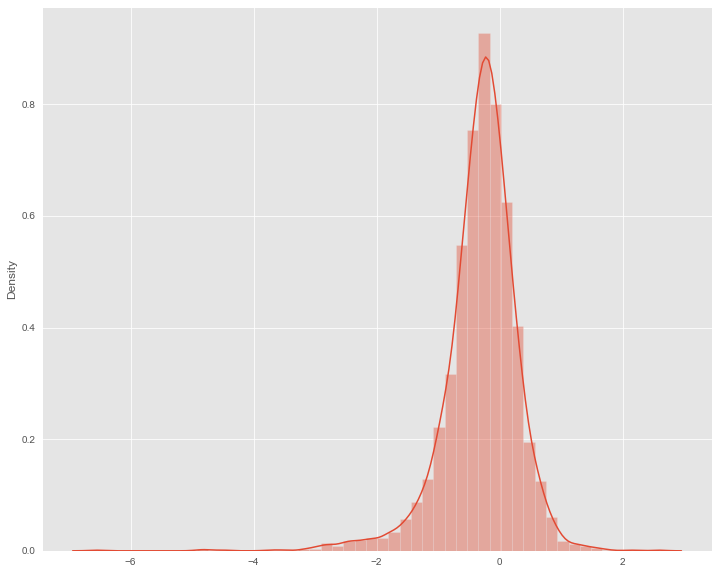

In [ ]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

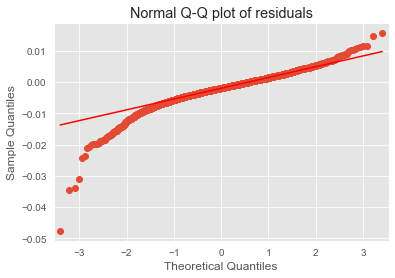

In [ ]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.

<div style="display:fill;
            border-radius: false;
            border-style: solid;
            border-color:#000000;
            border-style: false;
            border-width: 2px;
            color:#CF673A;
            font-size:15px;
            font-family: Georgia;
            background-color:#E8DCCC;
            text-align:center;
            letter-spacing:0.1px;
            padding: 0.1em;">

**<h2>♡ Thank you for taking the time ♡**